In [1]:
import numpy as np
import pandas as pd
#import xgboost as xgb
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt

from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
#from sklearn import cross_validation, metrics
from sklearn.preprocessing import Normalizer
#from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('c:/1/bank.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


opis danych

# Dane klienta banku

1 - age (numerycznie)

2 - job: rodzaj pracy (kategorycznie: „admin.”, „Pracownik fizyczny”, „przedsiębiorca”, „pokojówka”, „zarządzanie”, „emerytowany”, „samozatrudniony”, „ usługi ”,„ student ”,„ technik ”,„ bezrobotny ”,„ nieznany ”)

3 - marital: stan cywilny (kategorycznie:„ rozwiedziony ”,„ żonaty ”,„ samotny ”,„ nieznany ”; uwaga:„ rozwiedziony ”oznacza rozwiedziony lub owdowiały)

4 - education (kategoryczne: „podstawowy. 4 lata”, „podstawowy. 6 lat”, „podstawowy. 9 lat”, „szkoła średnia”, „analfabeta”, „kurs zawodowy”, „uniwersytet. stopień”, „nieznane”)

5 - default: czy kredyt jest niespłacony? (kategorycznie: „nie”, „tak”, „nieznany”)

6 - housing: ma kredyt mieszkaniowy?
(kategorycznie: „nie”, „tak”, „nieznany”) 

7 - loan: czy pożyczka osobista? (kategorycznie: „nie”, „tak”, „nieznany”)

# Powiązane z ostatnim kontaktem bieżącej kampanii

8 - contact: typ komunikacji kontaktowej (kategorycznie: „komórkowy”, „telefon”)

9 - month: ostatni miesiąc kontaktowy w roku (kategorycznie: „jan”, „lut”, „mar”, ..., „lis”, „dec”)

10 - day_of_week: ostatni dzień tygodnia w tygodniu (kategorycznie: „pon”, „wt”, „środ”, „czw”, „pt”)

11 - duration: czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.

# Inne atrybuty

12 - campaign: liczba kontaktów wykonanych podczas tej kampanii i dla tego klienta (numerycznie, obejmuje ostatni kontakt)

13 - pdays: liczba dni, które upłynęły od ostatniego kontaktu klienta z poprzedniej kampanii (numerycznie; 999 oznacza, że klient nie był wcześniej skontaktowano się)

14 - previous: liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

15 - poutcome: wynik poprzedniej kampanii marketingowej (kategorycznie: „porażka”, „nieistniejąca”, „sukces”)

# Atrybuty kontekstu społecznego i gospodarczego

16 - emp.var.rate: wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy)

17 - Cons.price.idx: wskaźnik cen konsumpcyjnych - wskaźnik miesięczny (liczbowy)

18 - cons.conf.idx: wskaźnik zaufania konsumentów - wskaźnik miesięczny (liczbowy )

19 - euribor3 mln: stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy)

20 - nr_employed: liczba zatrudnionych: liczba pracowników - wskaźnik kwartalny (liczbowy)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
Unnamed: 0        41188 non-null int64
Unnamed: 0.1      41188 non-null int64
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y            

In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20593.50000,20593.50000,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,11890.09578,11890.09578,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.00000,0.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,10296.75000,10296.75000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,20593.50000,20593.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,30890.25000,30890.25000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,41187.00000,41187.00000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'age', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Sprawdzanie typu danych

In [6]:
# jego sposób
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [7]:
#mój sposób
df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

# funkcja znajdowania brakujących wartości w zbiorze danych

In [8]:
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [9]:
# Pokazuje brakujące dane
df[show_missing()].isnull().sum()

Series([], dtype: float64)

Ale tu nie ma brakujących wartości w tym zbiorze

In [10]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# Analiza korelacji

y to kolumna wynikowa pokazująca czy się udało przekonać klienta czy nie

In [11]:
corr=df.corr()["y"]
corr[np.argsort(corr, axis=0)[::-1]]

y                 1.000000
duration          0.405274
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
Unnamed: 0.1     -0.006165
Unnamed: 0       -0.006165
campaign         -0.066357
cons_price_idx   -0.136211
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: y, dtype: float64

Tutej też mam lepsze - bo prostrze rozwiązanie niż on

# WIZUALIZACJA

# Fajny wykres

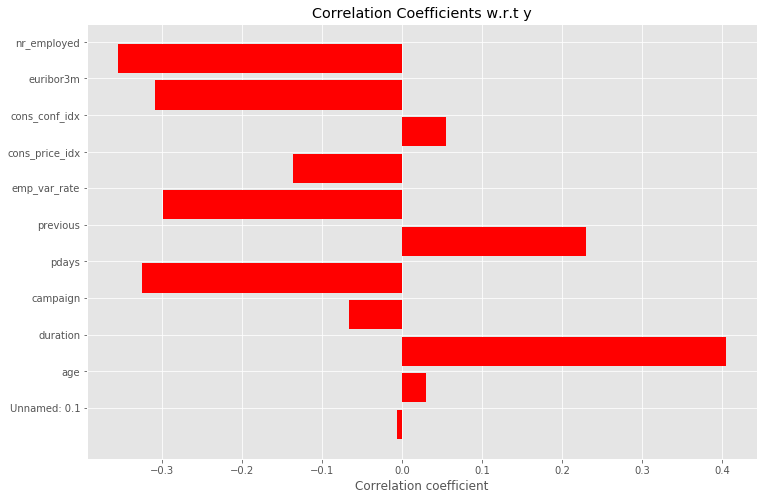

In [12]:
num_feat=df.columns[df.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.y.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t y");

Wykres macierzowy

Do skopiowania jest kolorek i linecolor

Text(0.5,1,'Correlation between features')

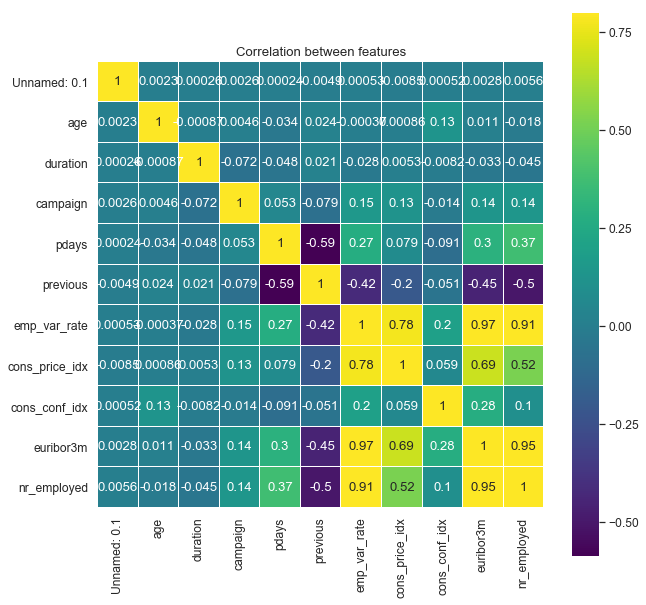

In [13]:
corrMatrix=df[num_feat].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features')

powyżej pokazuje korelację danych w jakim stopniu te kolumny wpływają na y

znalezienie rozkładu wieku

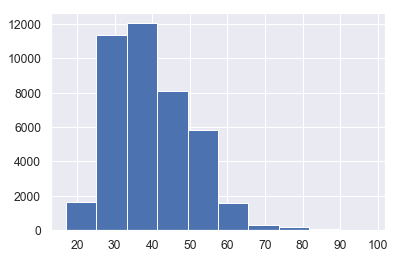

In [14]:
plt.hist(df.age,bins=10)
plt.show()

# Te wykresy po prostu są boskie i ta metoda 

- musiałem to wkleić z poprzedniego ćwiczenia

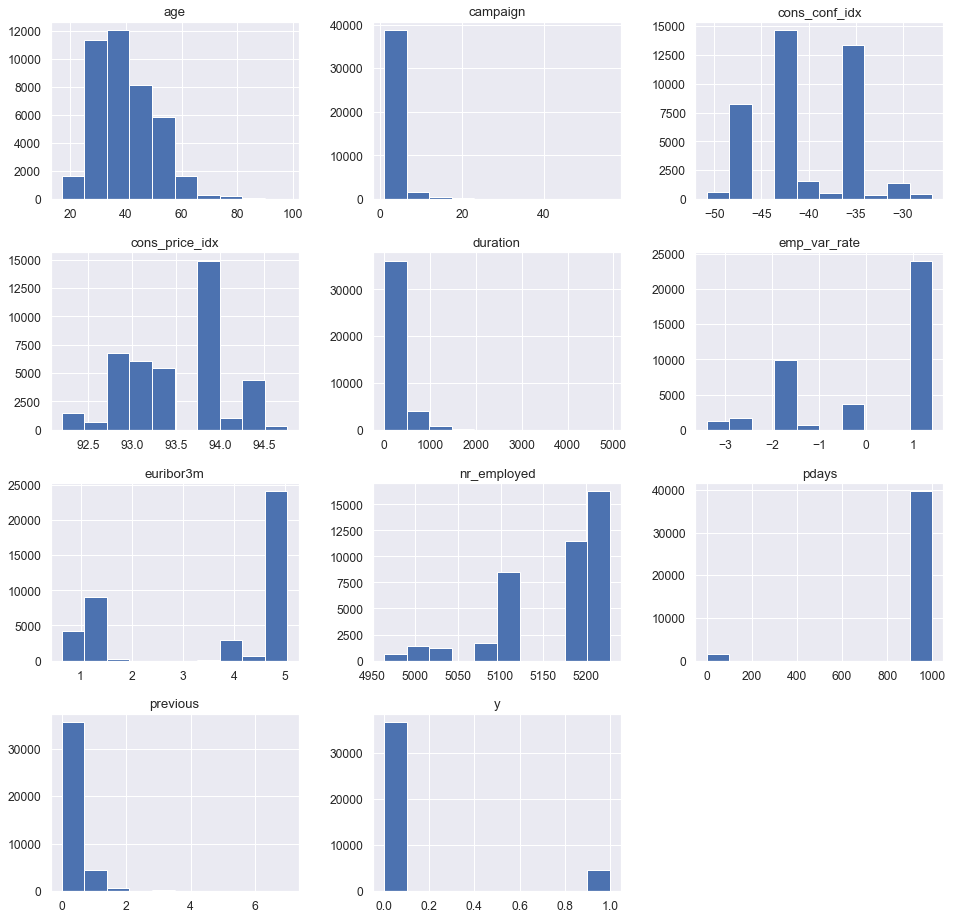

In [15]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

continuous_vars = df.describe().columns
_ = df.hist(column=continuous_vars, figsize = (16,16))

# pokazuje to, że kupiec między 25 a 40 jest bardziej skłonny do subskrypcji banku

Nie wiem jak on to stwierdził na podstawie poniższego wykresu. 

 duration: czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.


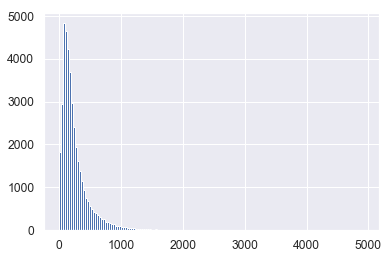

In [16]:
plt.hist((df.duration),bins=152)
plt.show()

zawężamy wykres aby poznać rozkład czasu trwania kontaktów telefonicznych liczonych w sekundach

In [17]:
dur2 = df[df.duration<400]

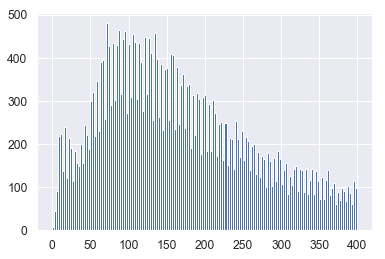

In [18]:
plt.hist((dur2.duration),bins=152)
plt.show()

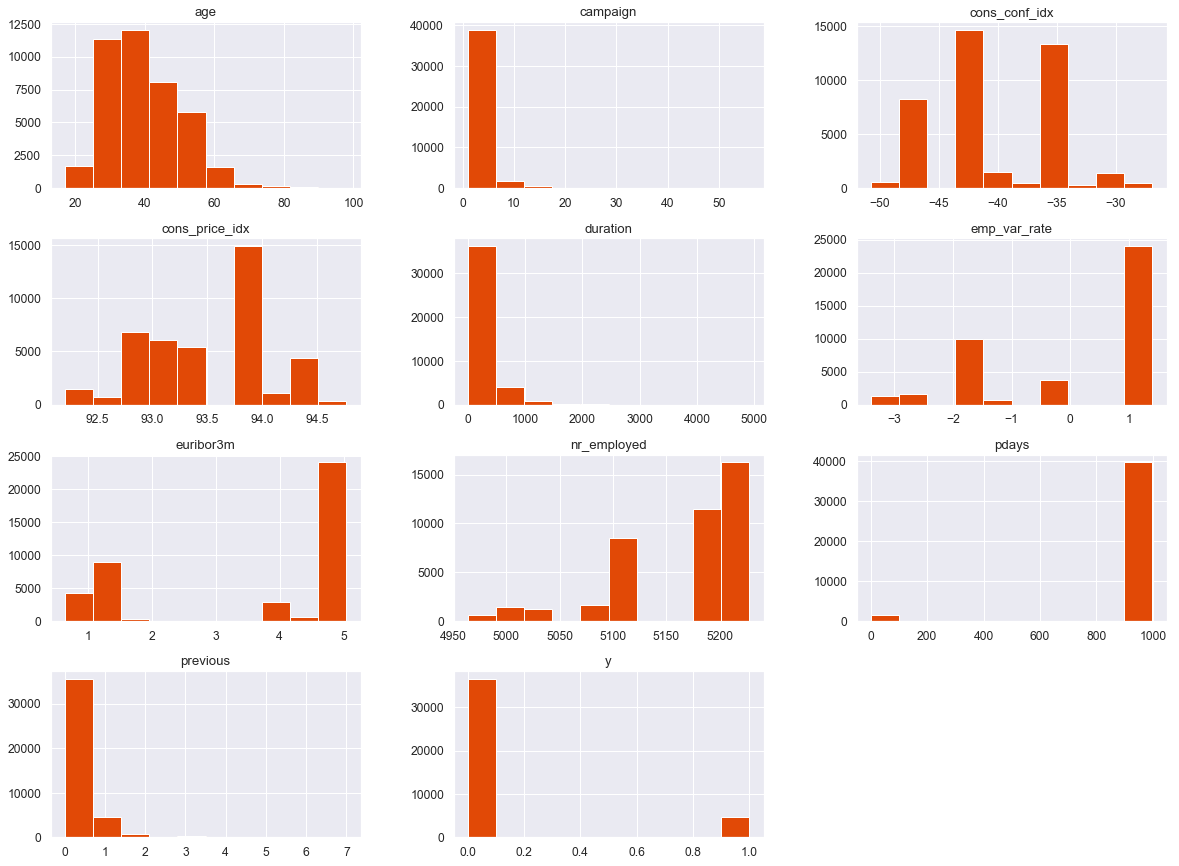

In [19]:
df.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

# PRAKTYCZNY WYKRES ZALEŻNOŚCI

ten wykres pokazuje zależność między y a czasem trwania ostatniego kontaktu

Text(0,0.5,'mean durations')

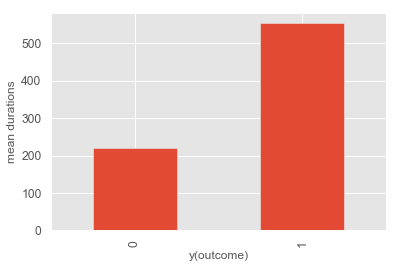

In [20]:
plt.style.use('ggplot')

ax = df.groupby('y').duration.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean durations")

Pokazuje, że średni czas rozmowy jest krotrzy dla tych co nie zrobili subskrypcji, dłuższe rozmowy - robi subskrypcje. Tutaj może miszać to, że jak jest duration=0 czyli czas rozmowy zero, to nie ma subskrypcji. Trzeba by wyczyścić baze z zer. Wyrzucić wszystkie te sytuacje.

Teraz zależność między wiekiem a subskrypcją

Myślałem że po to robie tabelę korelacji aby to pokazać - korelacja pokazywała że nie ma zależności
Korelacja z tego była taka: 0.03

Text(0,0.5,'mean ages')

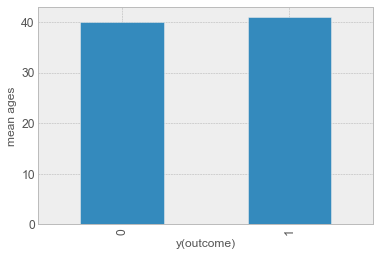

In [21]:
plt.style.use('bmh')


ax = df.groupby('y').age.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean ages")

previous: liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)
Korelacja z tego była taka: 0.230181

# Style Seaborn

'seaborn-darkgrid', 
'seaborn-notebook','classic', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-talk', 'dark_background', 'ggplot', 'fivethirtyeight', '_classic_test', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper', 'seaborn-white', 'seaborn-pastel', 'seaborn-dark', 'seaborn', 'seaborn-dark-palette'

Text(0,0.5,'mean previous')

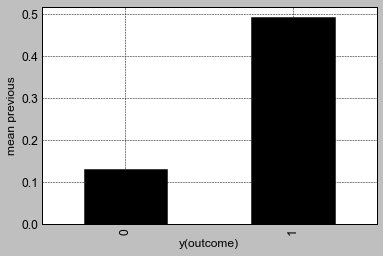

In [22]:
plt.style.use('grayscale')
ax = df.groupby('y').previous.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean previous")

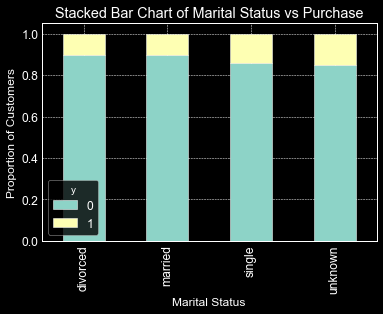

In [23]:
plt.style.use('dark_background')

table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

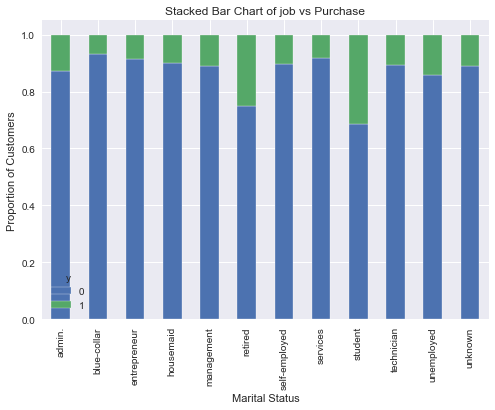

In [ ]:
plt.style.use('seaborn')

table=pd.crosstab(df.job,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of job vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

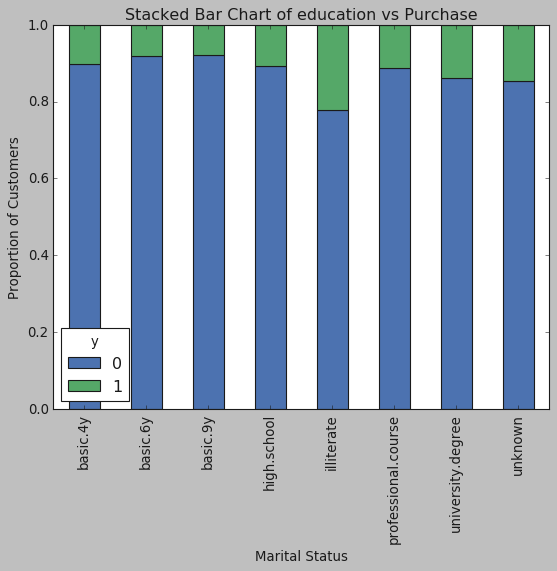

In [ ]:
plt.style.use('classic')

table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of education vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

# Robienie nowej kolumny z kategoriami 

Robie kategorie wieku: 20, 30, 40, 50, 60
I to mają być wartości o formacie liczb całkowitych
Też mam na to dobre sposoby ale ten sposób jest ok można go skopiować jako paczka

In [ ]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
df['age_category'] = df['age_category'].astype(np.int64)
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
age_category        int64
dtype: object

Wyświetlam nową kategorię

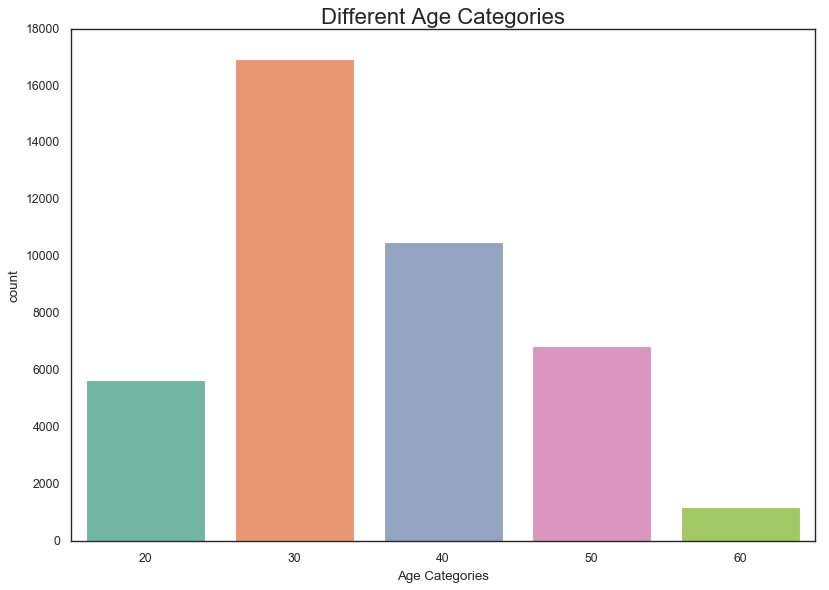

In [ ]:
import seaborn as sns

sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="age_category", data=df, palette="Set2")
ax.set_title("Different Age Categories", fontsize=20)
ax.set_xlabel("Age Categories")
plt.show()

# Wspaniały wykres który robi za groupBy 

Dzięki wbudowanej opcji: hue='y'
Wskaźniki dodatnie depozytów terminowych wśród osób w wieku 20 lat (lub młodszych) i 60 lat (lub starszych) były dodatnie

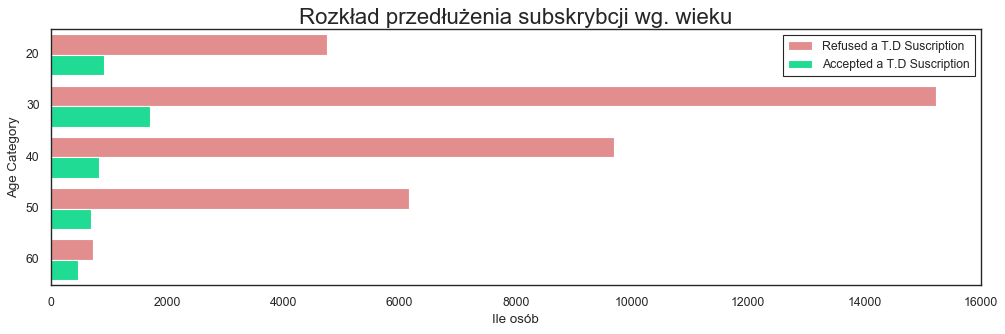

In [ ]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15, 4))
colors = ["#F08080", "#00FA9A"]
labels = ['No Deposit', 'Deposit']
sns.countplot(y="age_category", hue='y', data=df, palette=colors).set_title('Rozkład przedłużenia subskrybcji wg. wieku', fontsize=20)
ax.set_ylabel("Age Category")
ax.set_xlabel("Ile osób")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused a T.D Suscription')
legend_name.get_texts()[1].set_text('Accepted a T.D Suscription')

# Odpowiedzi o przedłuzeniu subskrypcji zaleznie od wykonywanego zawodu

Niewiele widać bo to powinno być zrobione procentowo
Nie mam czasu teraz szukać i wymyślać

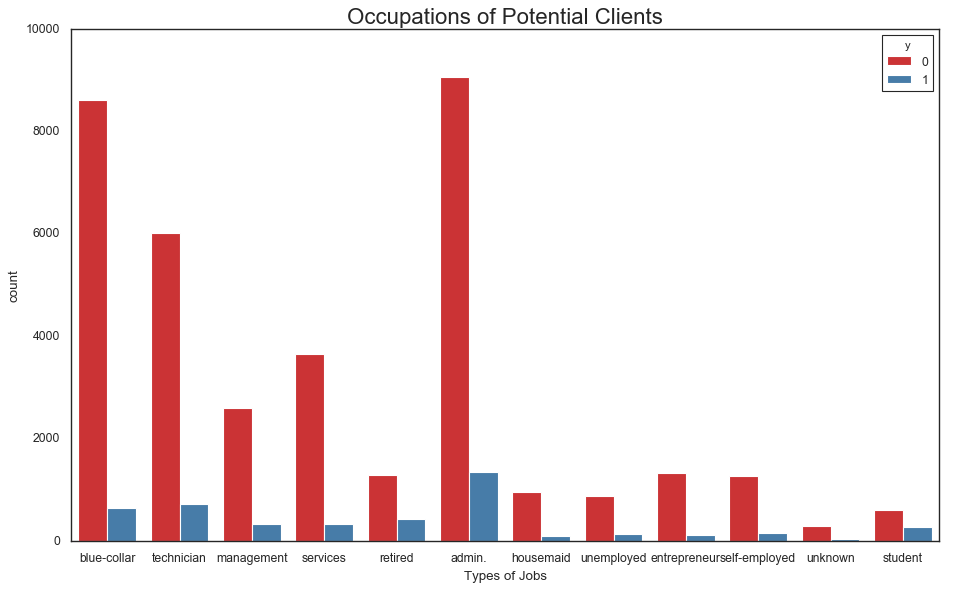

In [ ]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job", hue='y',data=df, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


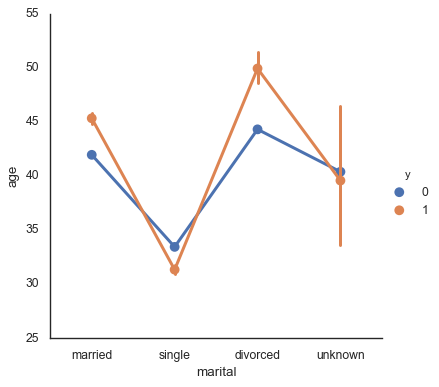

In [ ]:
sns.factorplot('marital','age',hue='y',data=df )

Czas trwania nie jest dobrym miernikiem bo jak wspominali nie znamy ile czasu bedziemy rozmawiai w rzyszłości - czas trwania powinien być wyrzucony z analizy

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


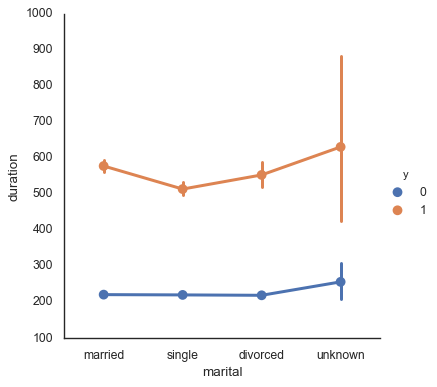

In [ ]:
sns.factorplot('marital','duration',hue='y',data=df )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


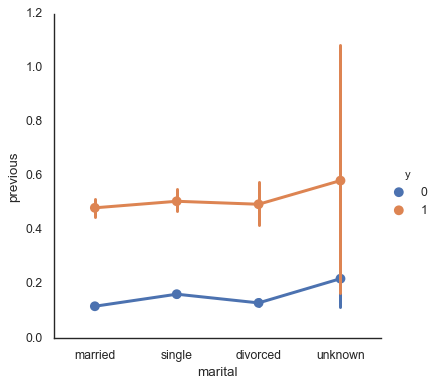

In [ ]:
sns.factorplot('marital','previous',hue='y',data=df )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


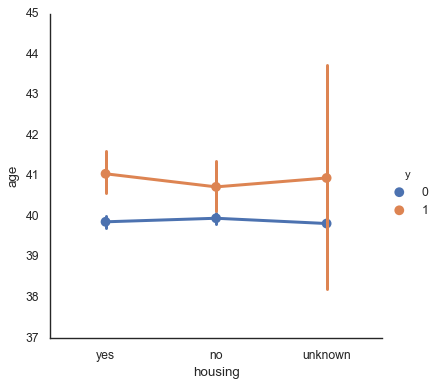

In [ ]:
sns.factorplot('housing','age',hue='y',data=df )

# Kto procentowo najczęściej przedłuża subskrybcję

Okazuje się, że najczęściej procentowo lokatę przedłużają studenc i emeryci

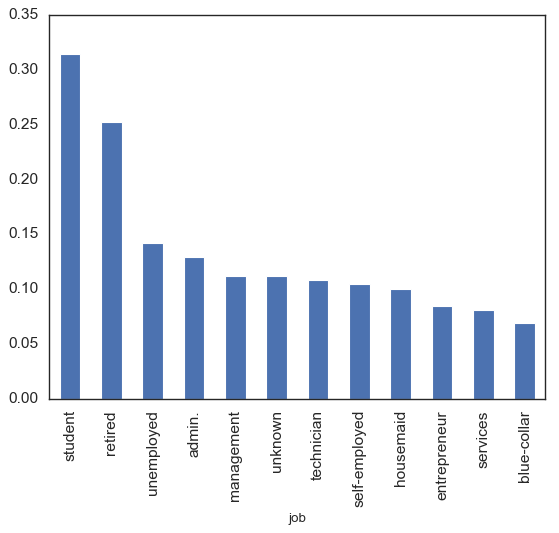

In [ ]:
KS = df.groupby('job').y.mean().sort_values(ascending=False)

KS.plot(kind='bar', fontsize=14)

# W jakim dniu tygdnia najczęściej wybierane jest przedłużenie subskrypcji

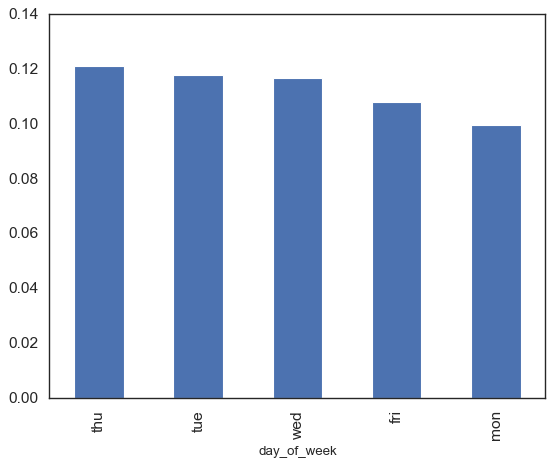

In [ ]:
KS = df.groupby('day_of_week').y.mean().sort_values(ascending=False)

KS.plot(kind='bar', fontsize=14)

# Miesiące, w których najczęściej podpisywane są przedłużenia umów

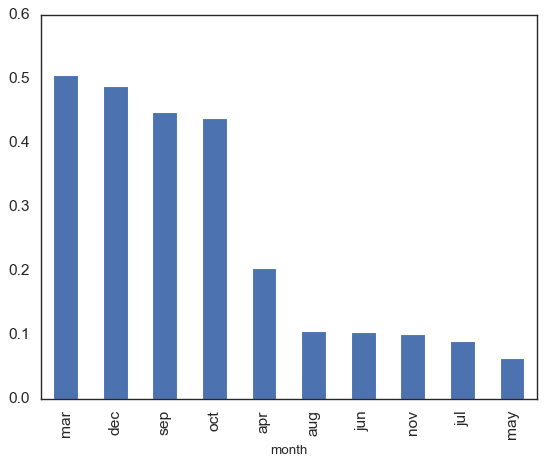

In [ ]:
KP = df.groupby('month').y.mean().sort_values(ascending=False)
KP.plot(kind='bar', fontsize=14)

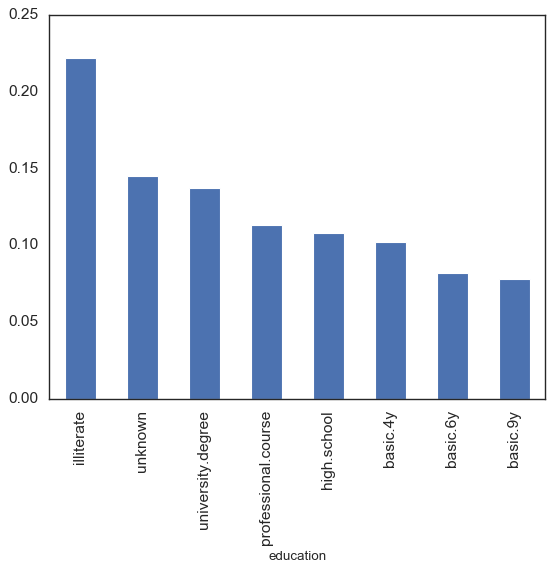

In [ ]:
KK = df.groupby('education').y.mean().sort_values(ascending=False)
KK.plot(kind='bar', fontsize=14)

# Skalowanie standardowe tylko dla wartości dyskretnych

Wybieram kolumny tkstowe, dyskretne, do głębszej analizy. Lepsze było to wybieranie dyskretne i ciągłe.

In [ ]:
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']

In [ ]:
df[encoding_list] = df[encoding_list].apply(LabelEncoder().fit_transform)

In [ ]:
df[encoding_list].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1,1,0,1,2,0,0,1,2,1
1,9,1,7,0,0,0,0,7,0,1
2,4,2,6,0,2,0,0,4,2,2
3,7,1,3,0,0,0,0,0,0,1
4,5,1,0,0,2,0,0,1,0,2


# Tworzymy zestaw treningowy i zestaw testowy, budujemy model

In [ ]:
y = df['y']
X = df.drop('y', axis=1) 

Złoty podział zioru na testowy i treningowy

In [ ]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

In [ ]:
print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (27595, 21)
Zbiór X testowy:     (13593, 21)
Zbiór y treningowy:  (27595,)
Zbiór y testowy:     (13593,)


Dane dyskretne są zdygitalizowane

In [ ]:
Xtrain.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,age_category
24697,49,1,1,2,1,0,0,1,4,4,...,9,999,0,1,1.4,94.465,-41.8,4.959,5228.1,40
25855,38,9,0,6,1,0,0,0,1,1,...,3,999,0,1,1.4,93.444,-36.1,4.963,5228.1,30
23236,42,0,0,6,0,0,0,1,4,0,...,4,999,0,1,1.4,94.465,-41.8,4.959,5228.1,40
13812,58,1,1,5,1,0,2,1,4,2,...,1,999,0,1,1.4,94.465,-41.8,4.866,5228.1,50


# Different Classification Models:

# Logistic Regression

In [ ]:
# Logistic Regression
#log_reg = LogisticRegression()
#log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
#log_reg_mean = log_scores.mean()
#print(log_reg_mean)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain, ytrain) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [ ]:
ypred = LR_Grid.predict(Xtest)

In [ ]:
## confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[11768,   294],
       [  999,   532]], dtype=int64)

In [ ]:
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12062
           1       0.64      0.35      0.45      1531

   micro avg       0.90      0.90      0.90     13593
   macro avg       0.78      0.66      0.70     13593
weighted avg       0.89      0.90      0.89     13593



In [ ]:
print("Accuracy:   ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

Accuracy:    0.9
Precision:   0.64
Recall:      0.35
F1 score:    0.45


Model regresji logistycznej jest słaby. 
1. Może jest słaby bo nikt nie zrobił oversamplin bo zbiór jest wyraźnie niezbilansowany
2. Może trzeba zdygitalizować zmienne dyskretne 


#  KNearestNeighbors

In [ ]:
# KNearestNeighbors
#knn_clf = KNeighborsClassifier()
#knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
#knn_mean = knn_scores.mean()

# Decision Tree

In [ ]:
# Decision Tree
#tree_clf = tree.DecisionTreeClassifier()
#tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
#tree_mean = tree_scores.mean()
#print(tree_mean)

# Gradient Boosting Classifier

In [ ]:
# Gradient Boosting Classifier
#grad_clf = GradientBoostingClassifier()
#grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
#grad_mean = grad_scores.mean()
#print(grad_mean)

# Random Forest Classifier

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [ ]:
# Random Forest Classifier
#rand_clf = RandomForestClassifier(n_estimators=18)
#rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
#rand_mean = rand_scores.mean()
#print(rand_mean)

In [ ]:
## RUSZYŁO I DZIAŁA ALE TAK SIĘ CHYBA NIE ROBI!!!
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
# random forest model creation

pipeline = make_pipeline(preprocessing.RobustScaler(), RandomForestClassifier(n_estimators = 100, 
                   max_features=0.25, n_jobs=-1))


hyperparameters = {'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
                   'randomforestclassifier__max_depth': [None, 5, 3, 1]}


rfc = GridSearchCV(pipeline, hyperparameters, cv=10)
rfc.fit(Xtrain,ytrain)
# predictions
rfc_predict = rfc.predict(Xtest)

Parametry RandoForestClassifier

1. n_estimators : parametr n_estimators określa liczbę drzew w lesie modelu. Domyślna wartość tego parametru to 10, co oznacza, że w losowym lesie zostanie zbudowanych 10 różnych drzew decyzyjnych.

2. max_depth : Parametr max_depth określa maksymalną głębokość każdego drzewa. Domyślna wartość parametru max_depth to None, co oznacza, że każde drzewo będzie się rozwijać, aż każdy liść będzie czysty. Czysty liść to taki, w którym wszystkie dane na liściu pochodzą z tej samej klasy.

3. min_samples_split : parametr min_samples_split określa minimalną liczbę próbek wymaganych do podziału wewnętrznego węzła liścia. Wartością domyślną tego parametru jest 2, co oznacza, że węzeł wewnętrzny musi mieć co najmniej dwie próbki, aby można go było podzielić, aby uzyskać bardziej szczegółową klasyfikację.

4. min_samples_leaf: parametr min_samples_leaf określa minimalną liczbę próbek wymaganych w węźle liścia. Wartością domyślną tego parametru jest 1, co oznacza, że każdy liść musi mieć co najmniej 1 próbkę, którą klasyfikuje.

5. max_features : int, float, string lub None, opcjonalne (domyślnie = „auto”).Liczba funkcji, które należy wziąć pod uwagę, szukając najlepszego podziału.

6. n_jobs : int lub None, opcjonalne (domyślnie = None). Liczba zadań do uruchomienia równoległego dla obu fiti predict. Noneoznacza 1, chyba że w joblib.parallel_backend kontekście. -1 oznacza użycie wszystkich procesorów.

https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

In [ ]:
ypred = rfc.predict(Xtest)

In [ ]:
co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

In [ ]:
print(classification_report(ytest, ypred)) 

In [ ]:
print("Accuracy:   ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

# NeuralNet Classifier

In [ ]:
# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()
print(neural_mean)

# Naives Bayes

In [ ]:
# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()
print(nav_mean)

Dalsza praca nad grafikami: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8